In [1]:
from numpy import expand_dims
from imutils import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import cv2

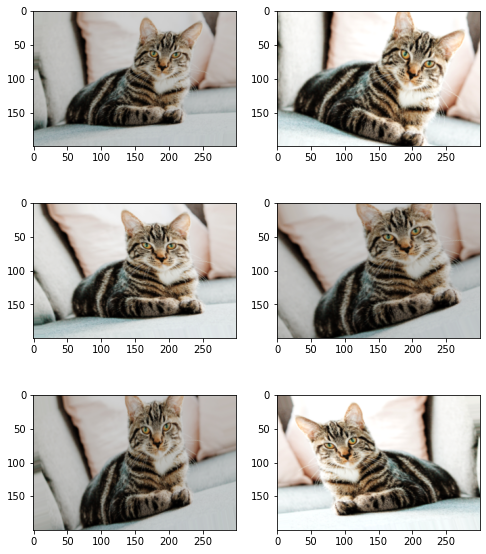

In [2]:
plt.figure(figsize=(8,10))

image = cv2.imread('cat.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = resize(image,width=300)

# expand dimension to one sample
sample = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=10,
    brightness_range=[0.80,1.20],
    fill_mode='nearest'
)

# prepare iterator
iterator = datagen.flow(sample, batch_size=1,seed=42)


for i in range(6):
    plt.subplot(3,2,i+1)
    # generate batch of images
    batch = iterator.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    plt.imshow(image)